In [70]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [71]:
# Carregando o conjunto de dados Iris
iris = load_iris()
x = iris.data
y = iris.target

In [72]:
# Dividindo o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### KNN

- Supervisionado

In [73]:
k = 7
knn_accuracies = []
knn_precisions = []
knn_recalls = []
knn_f1_scores = []

In [74]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
knn_accuracies = accuracy
knn_precisions = precision
knn_recalls = recall
knn_f1_scores = f1

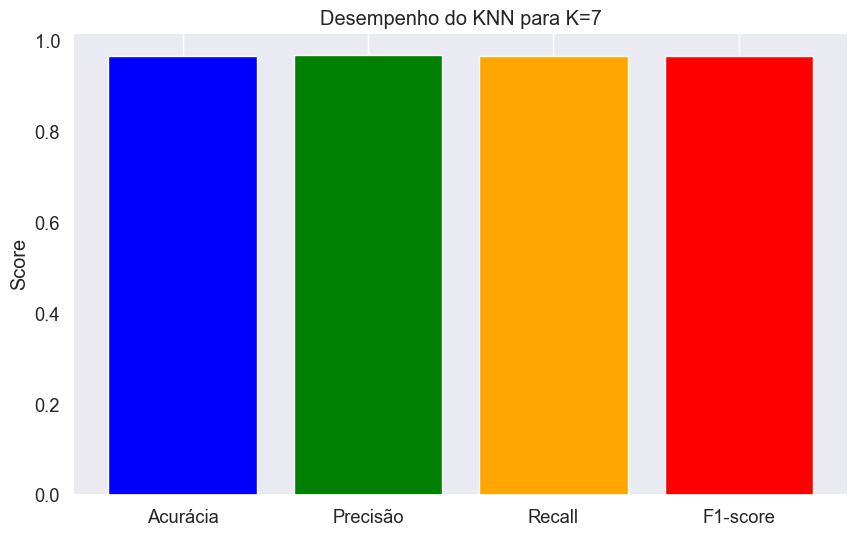

Matriz de Confusão para K=7
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [75]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Plotando as métricas em um gráfico de barras
metrics = [accuracy, precision, recall, f1]
labels = ['Acurácia', 'Precisão', 'Recall', 'F1-score']

plt.figure(figsize=(10, 6))
plt.bar(labels, metrics, color=['blue', 'green', 'orange', 'red'])
plt.title('Desempenho do KNN para K=' + str(k))
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

# Matriz de confusão para o valor de K escolhido
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão para K=" + str(k))
print(conf_matrix)

| sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | Flor |
|------|------|------|------|------|
| 5.1 | 3.5 | 1.4 | 0.2 |  0 |
| 4.9 | 3. |  1.4 | 0.2 |  0 |
| 6.2 | 3.4 | 5.4 | 2.3 |  2 |
| 5.9 | 3. |  5.1 | 1.8 |  2 |

Incluindo novo test:
| sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm)
|------|------|------|------|
| 5.7 | 3.8 | 1.7 | 0.3 |

Distancia = (((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2) + ((w2 - w1) ** 2)) ** (1 / 2)

| Flor | Distância |
|------|-----------|
| 0 | 0.7416198487095667 |
| 0 | 1.1747340124470729 |
| 2 | 4.254409477236529 |
| 2 | 3.806573262134856 |

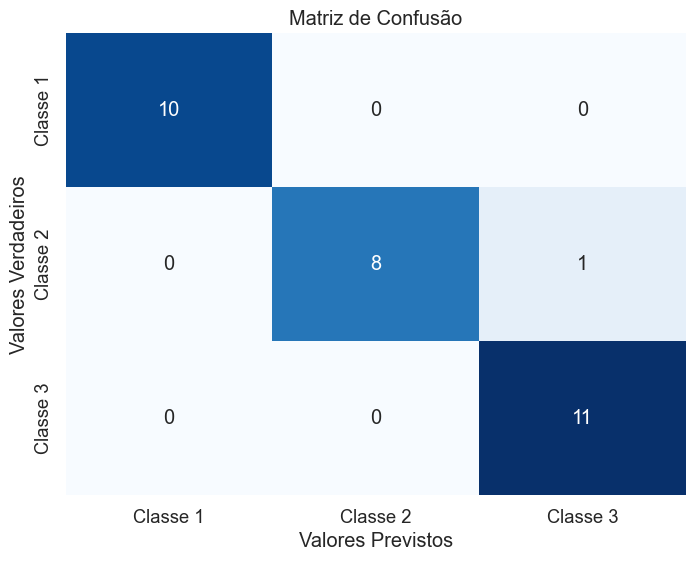

In [76]:
matriz_confusao = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Escala de fonte
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 1', 'Classe 2', 'Classe 3'],
            yticklabels=['Classe 1', 'Classe 2', 'Classe 3'])

# Adicionando rótulos e título
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Verdadeiros')
plt.title('Matriz de Confusão')

# Mostrando o plot
plt.show()

In [77]:
# classes = [0, 1, 2]

# # Plotando matriz de confusão
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
# plt.title('Matriz de Confusão')
# plt.xlabel('Classe Prevista')
# plt.ylabel('Classe Real')
# plt.show()

In [78]:
def distancia_euclidiana(x1, x2, y1, y2, z1, z2, w1, w2):
    return (((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2) + ((w2 - w1) ** 2)) ** (1 / 2)

In [79]:
plantas = [
[5.1 , 3.5 , 1.4 , 0.2 ,  0 ],
[4.9 , 3. ,  1.4 , 0.2 ,  0 ],
[6.2 , 3.4 , 5.4 , 2.3 ,  2 ],
[5.9 , 3. ,  5.1 , 1.8 ,  2 ],
]

In [80]:
for planta in plantas:
    dist = distancia_euclidiana(5.7, planta[0], 3.8, planta[1], 1.7, planta[2], 0.3, planta[3])
    print(planta[4], dist)

0 0.7416198487095667
0 1.1747340124470729
2 4.254409477236529
2 3.806573262134856


### Kmeans

- Não Supervisionado

In [81]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=42)

In [82]:
centroids = kmeans.cluster_centers_
centroids

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

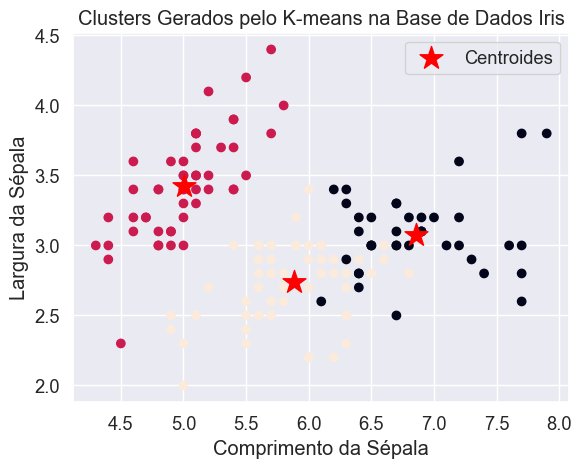

In [83]:
# Plotando os clusters
labels = kmeans.labels_
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='Centroides')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.title('Clusters Gerados pelo K-means na Base de Dados Iris')
plt.legend()
plt.show()

In [84]:
from sklearn.metrics import silhouette_score

# Inertia
inertia = kmeans.inertia_
print("Inércia:", inertia)

Inércia: 78.8556658259773


### Diferenças

O KMEANS por ser não supervisionado, ele aprende "sozinho" não necessitando de ter a informação do Y para poder segmentar os registros.